# Optimizer


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from srcs.modules.optimizer import SGD, Momentum, Nesterov, AdaGrad, RMSProp, Adam

## 各optimizerの特徴

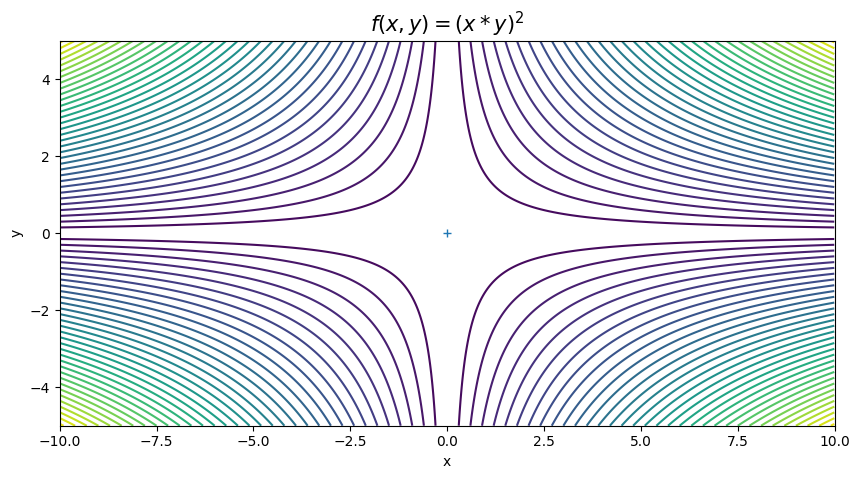

In [6]:
# パラメータ空間
def f(x, y, n=1):
    return np.abs(x * y)**n

def df(x, y, n=1):
    abs_val = np.abs(x * y)
    sign = np.sign(x * y)
    dx = n * y * abs_val**(n - 1) * sign  # df / dx
    dy = n * x * abs_val**(n - 1) * sign  # df / dy
    return dx, dy

def plot_path(path_x = None, path_y = None, title = None):
    x = np.arange(-10, 10, 0.01)    # x軸の値
    y = np.arange(-5, 5, 0.01)      # y軸の値
    X, Y = np.meshgrid(x, y)        # 格子状の点に変換
    Z = f(X, Y)

    plt.figure(figsize=(10, 5))

    plt.contour(X, Y, Z, levels=40)
    if path_x is not None:
        plt.plot(path_x, path_y, 'o-', color='red')  # パラメータの推移
    plt.plot(0, 0, '+')
    plt.xlim(-10, 10)
    plt.ylim(-5, 5)
    plt.xlabel("x")
    plt.ylabel("y")
    if title is not None:
        plt.title(title, fontsize=15)
    else:
        plt.title("$f(x, y) = (x * y)^2$", fontsize=15)
    plt.show()

plot_path()


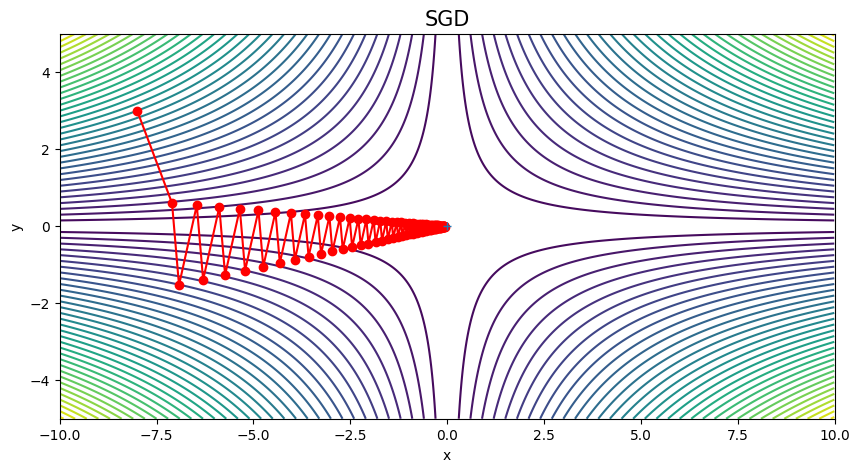

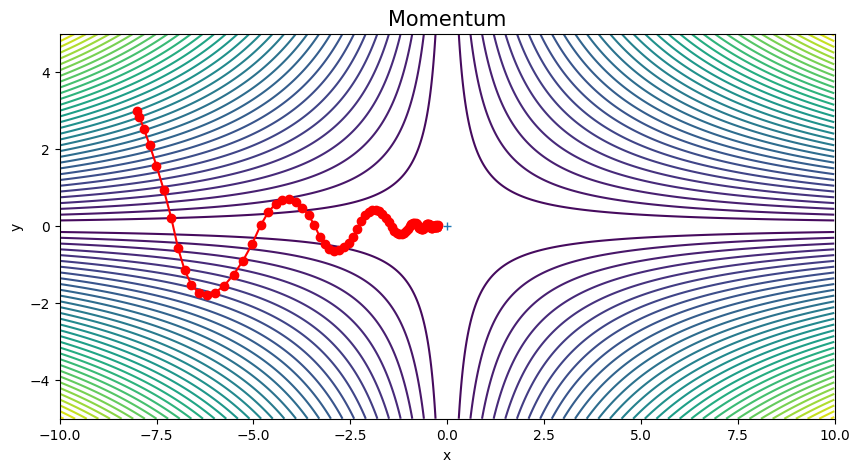

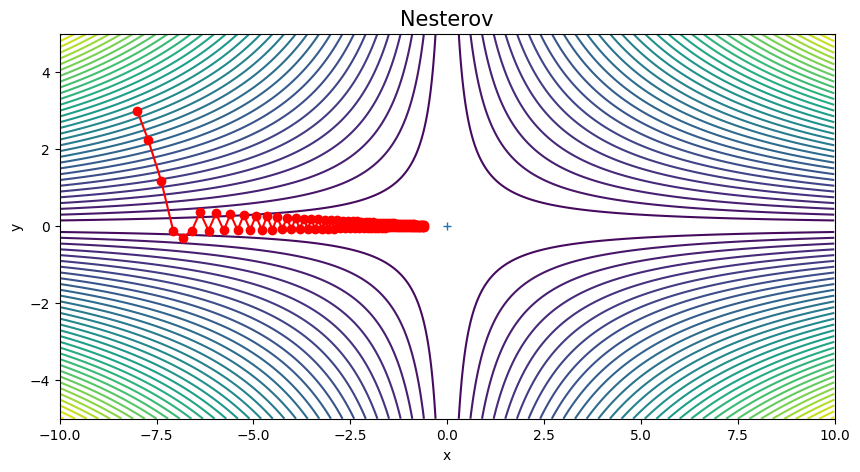

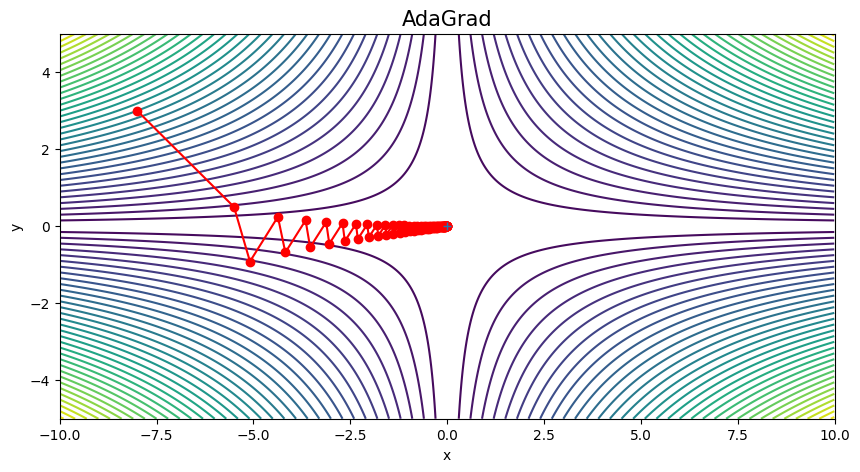

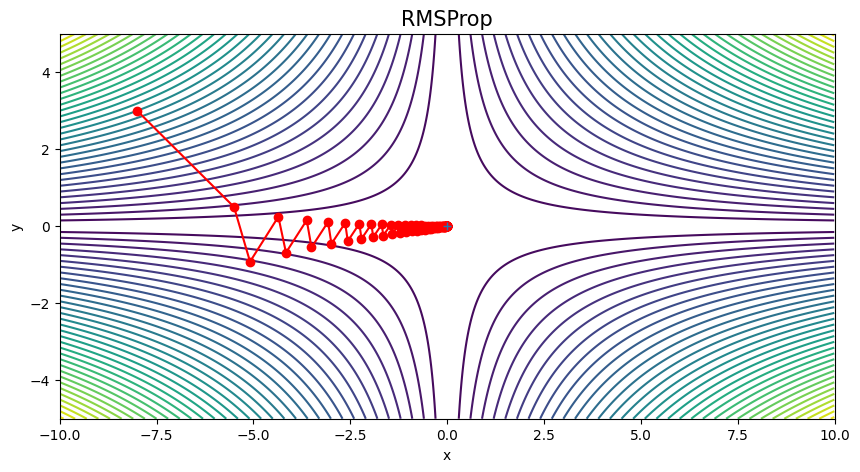

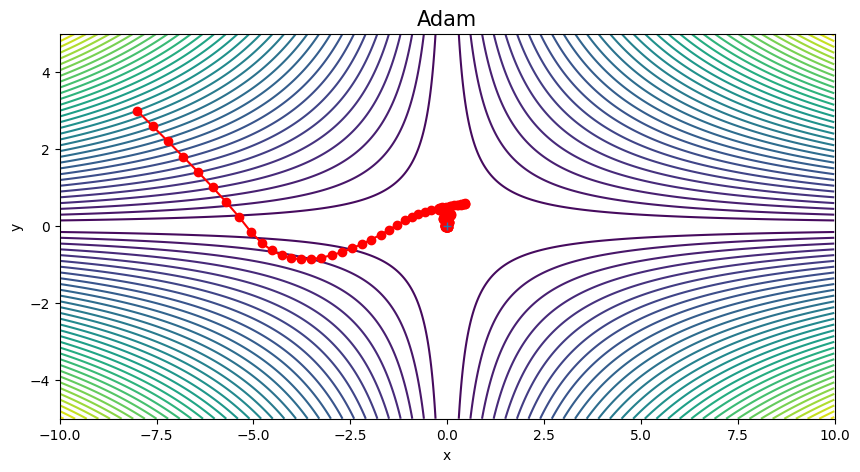

In [7]:
def get_path(x0: float, y0: float, optimizer: any, itr: int):
    params = {'x': x0, 'y': y0}
    grads = {'x': 0, 'y': 0}

    x_history = []
    y_history = []

    x_history.append(params['x'])
    y_history.append(params['y'])

    for _ in range(itr):
        grads['x'], grads['y'] = df(params['x'], params['y'])

        optimizer.update(params, grads)

        x_history.append(params['x'])
        y_history.append(params['y'])

    return x_history, y_history

optimizers = {
    "SGD": SGD(lr=0.3),
    "Momentum": Momentum(lr=0.02),
    "Nesterov": Nesterov(lr=0.05),
    "AdaGrad": AdaGrad(lr=2.5),
    "RMSProp": RMSProp(lr=0.25),
    "Adam": Adam(lr=0.4)
}

itr = 100
for name, optimizer in optimizers.items():
    x_path, y_path = get_path(x0=-8.0, y0=3.0, optimizer=optimizer, itr=itr)
    plot_path(x_path, y_path, name)


## 各Optimizerによる訓練

In [5]:
from srcs.modules.functions import Softmax, np_log, numerical_gradient
from srcs.modules.activation import ReLU, Sigmoid
from srcs.modules.loss import cross_entropy, CrossEntropyLoss
from srcs.modules.init import he_normal, xavier_normal, normal

from srcs.modules.layer import Dense
from srcs.modules.model import Sequential
from srcs.modules.plot import plot_multiple_models
from srcs.dataloader import get_wdbc
from srcs.train import train_model

In [6]:
X_train, X_valid, t_train, t_valid = get_wdbc(csv_path="../data/data.csv")


train SGD

Metrics: 
 Train [Accuracy:0.9320, Precision:0.9427, Recall:0.8706, F1:0.9052]
 Valid [Accuracy:0.9381, Precision:0.9730, Recall:0.8571, F1:0.9114]

train AdaGrad

Metrics: 
 Train [Accuracy:0.9320, Precision:0.9728, Recall:0.8412, F1:0.9022]
 Valid [Accuracy:0.9027, Precision:0.9697, Recall:0.7619, F1:0.8533]

train Adam

Metrics: 
 Train [Accuracy:0.9189, Precision:0.9030, Recall:0.8765, F1:0.8896]
 Valid [Accuracy:0.9292, Precision:0.9722, Recall:0.8333, F1:0.8974]


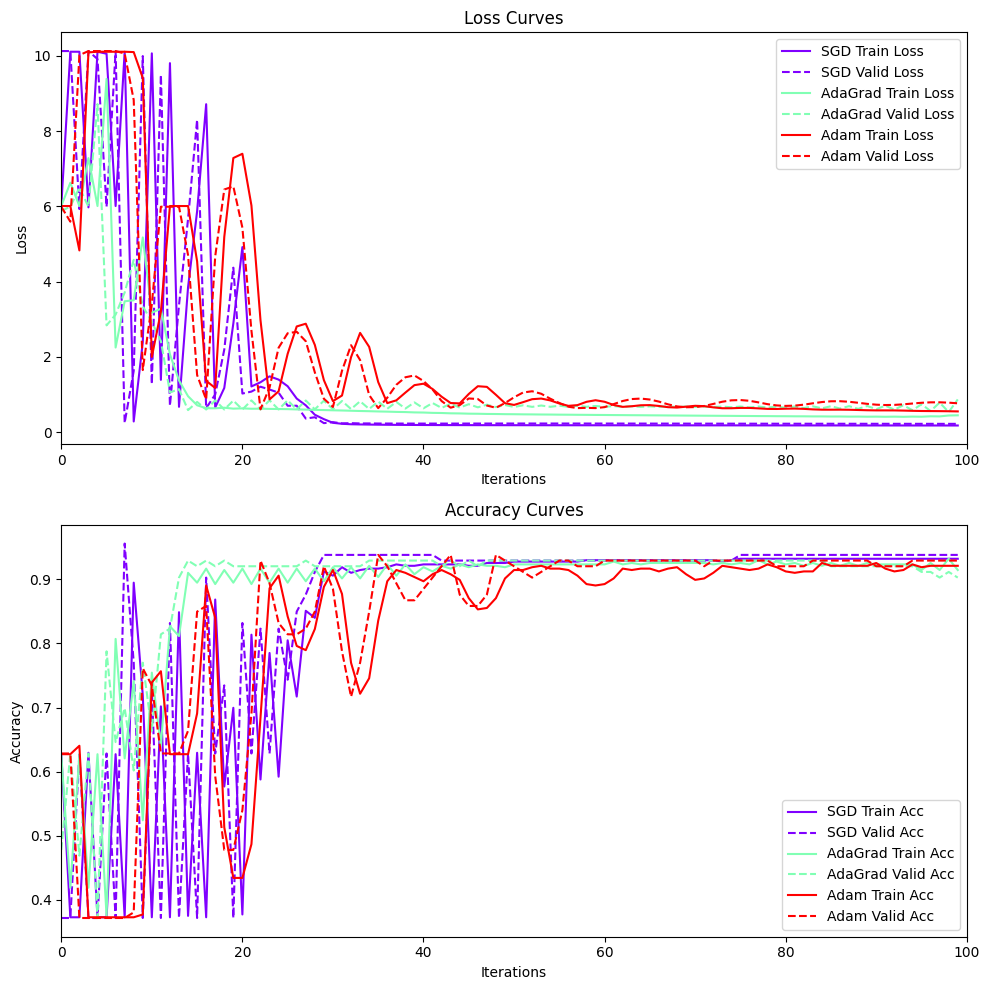

In [32]:
seed = 42
sgd_net = Sequential(
    layers=[
        Dense(in_features=30, out_features=50, activation=ReLU, init_method=he_normal, seed=seed),
        Dense(in_features=50, out_features=50, activation=ReLU, init_method=he_normal, seed=seed),
        Dense(in_features=50, out_features=2, activation=Softmax, init_method=xavier_normal, seed=seed)
    ],
    criteria=CrossEntropyLoss,
    optimizer=SGD(lr=0.0005),
)

adagrad_net = Sequential(
    layers=[
        Dense(in_features=30, out_features=50, activation=ReLU, init_method=he_normal, seed=seed),
        Dense(in_features=50, out_features=50, activation=ReLU, init_method=he_normal, seed=seed),
        Dense(in_features=50, out_features=2, activation=Softmax, init_method=xavier_normal, seed=seed)
    ],
    criteria=CrossEntropyLoss,
    optimizer=AdaGrad(lr=0.005),
)

adam_net = Sequential(
    layers=[
        Dense(in_features=30, out_features=50, activation=ReLU, init_method=he_normal, seed=seed),
        Dense(in_features=50, out_features=50, activation=ReLU, init_method=he_normal, seed=seed),
        Dense(in_features=50, out_features=2, activation=Softmax, init_method=xavier_normal, seed=seed)
    ],
    criteria=CrossEntropyLoss,
    optimizer=Adam(lr=0.002),
)

models = {
    "SGD"       : sgd_net,
    "AdaGrad"   : adagrad_net,
    "Adam"      : adam_net,
}


models_results = []
max_itr = 100
for name, model in models.items():
    print(f"\ntrain {name}")
    iterations, train_losses, train_accs, valid_losses, valid_accs = train_model(
        model=model,
        X_train=X_train,
        t_train=t_train,
        X_valid=X_valid,
        t_valid=t_valid,
        iters_num=max_itr,
        verbose=False,
        plot=False,
        name="WDBC"
    )
    models_results.append({
        'name'          : name,
        'iterations'    : iterations,
        'train_losses'  : train_losses,
        'train_accs'    : train_accs,
        'valid_losses'  : valid_losses,
        'valid_accs'    : valid_accs
    })


plot_multiple_models(max_itr, models_results)
